# Concrete Compressive Strength Prediction

- Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

1. Problem statement

- Develop a predictive model for concrete compressive strength based on various mix proportions and curing conditions, utilizing machine learning techniques.

2. Data Collection

- Dataset Source - [Kaggle](https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networking/download?datasetVersionNumber=1)
- The data consists of 9 column and 1030 rows.

2.1 Import Data and Required Packages

- Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [44]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set(context= "notebook", color_codes=True)
plt.style.use('bmh')

%matplotlib inline
pd.set_option('display.max_columns', None)

Import the CSV Data as Pandas DataFrame

In [11]:
df = pd.read_csv('C:\\Users\\VENKA\\Desktop\\Data Science\\Project\\concrete\\notebook\\data\\concrete_data.csv')

Show Top 5 Records

In [12]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Shape of the dataset

In [15]:
print(f"The shape of the DataFrame is: {df.shape}, which means there are {df.shape[0]} rows and {df.shape[1]} columns.")

The shape of the DataFrame is: (1030, 9), which means there are 1030 rows and 9 columns.


2.2 Dataset information

| Attribute          | Measure                                      |  Description  |
|--------------------|--------------------------------------------------|------------------------|
| **Cement**         | kg/m3 mixture                                    | Binding material       |
| **Blast Furnace Slag**           | kg/m3 mixture                                    | Cement replacement     |
| **Fly Ash**         | kg/m3 mixture                                    | Cement replacement     |
| **Water**          | kg/m3 mixture                                    | Mixing ingredient      |
| **Superplasticizer**| kg/m3 mixture                                   | Concrete additive      |
| **Coarse Aggregate**     | kg/m3 mixture                                    | Aggregate              |
| **Fine Aggregate**       | kg/m3 mixture                                    | Aggregate              |
| **Age**            | day (1~365)                                      | Time since mixing      |
| **Strength**       | megapascals (MPa) or pounds per square inch (psi)                 | Compressive strength      |


3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

3.1 Check Missing values

In [14]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

> There are no missing values in the data set

3.2 Check Duplicates

In [17]:
df.duplicated().sum()

25

> There are 25 duplicate values in the data set, So need to remove it.

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

3.3 Check data types

In [20]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1005 non-null   float64
 1   Blast Furnace Slag  1005 non-null   float64
 2   Fly Ash             1005 non-null   float64
 3   Water               1005 non-null   float64
 4   Superplasticizer    1005 non-null   float64
 5   Coarse Aggregate    1005 non-null   float64
 6   Fine Aggregate      1005 non-null   float64
 7   Age                 1005 non-null   int64  
 8   Strength            1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


> There are 8 columns with float datatype and one column with int. There seem to be no null values in any of the columns

3.4 Checking the number of unique values of each column

In [21]:
df.nunique()

Cement                278
Blast Furnace Slag    185
Fly Ash               156
Water                 195
Superplasticizer      111
Coarse Aggregate      284
Fine Aggregate        302
Age                    14
Strength              845
dtype: int64

3.5 Check statistics of data set

In [22]:
df_summary = df.describe()
df_summary.T

,count,mean,std,min,25%,50%,75%,max
Cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
Blast Furnace Slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
Fly Ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
Water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
Superplasticizer,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
Coarse Aggregate,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
Fine Aggregate,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
Age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
Strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


##### Insight
- From above description of numerical data, all means are very close to each other - between 6.03 and 974.376;
- All standard deviations are also close - between 5.91 and 104.34;
- The columns **Blast Furnace Slag**, **Fly Ash** and **Superplasticizer** have zero values which could be thought of as missing values and fill them using regression.

In [23]:
zero_values = (df == 0)
zero_value_locations = zero_values.any()
zero_value_counts = zero_values.sum()
print(zero_value_counts)

Cement                  0
Blast Furnace Slag    470
Fly Ash               541
Water                   0
Superplasticizer      378
Coarse Aggregate        0
Fine Aggregate          0
Age                     0
Strength                0
dtype: int64


3.6 Check for outliers

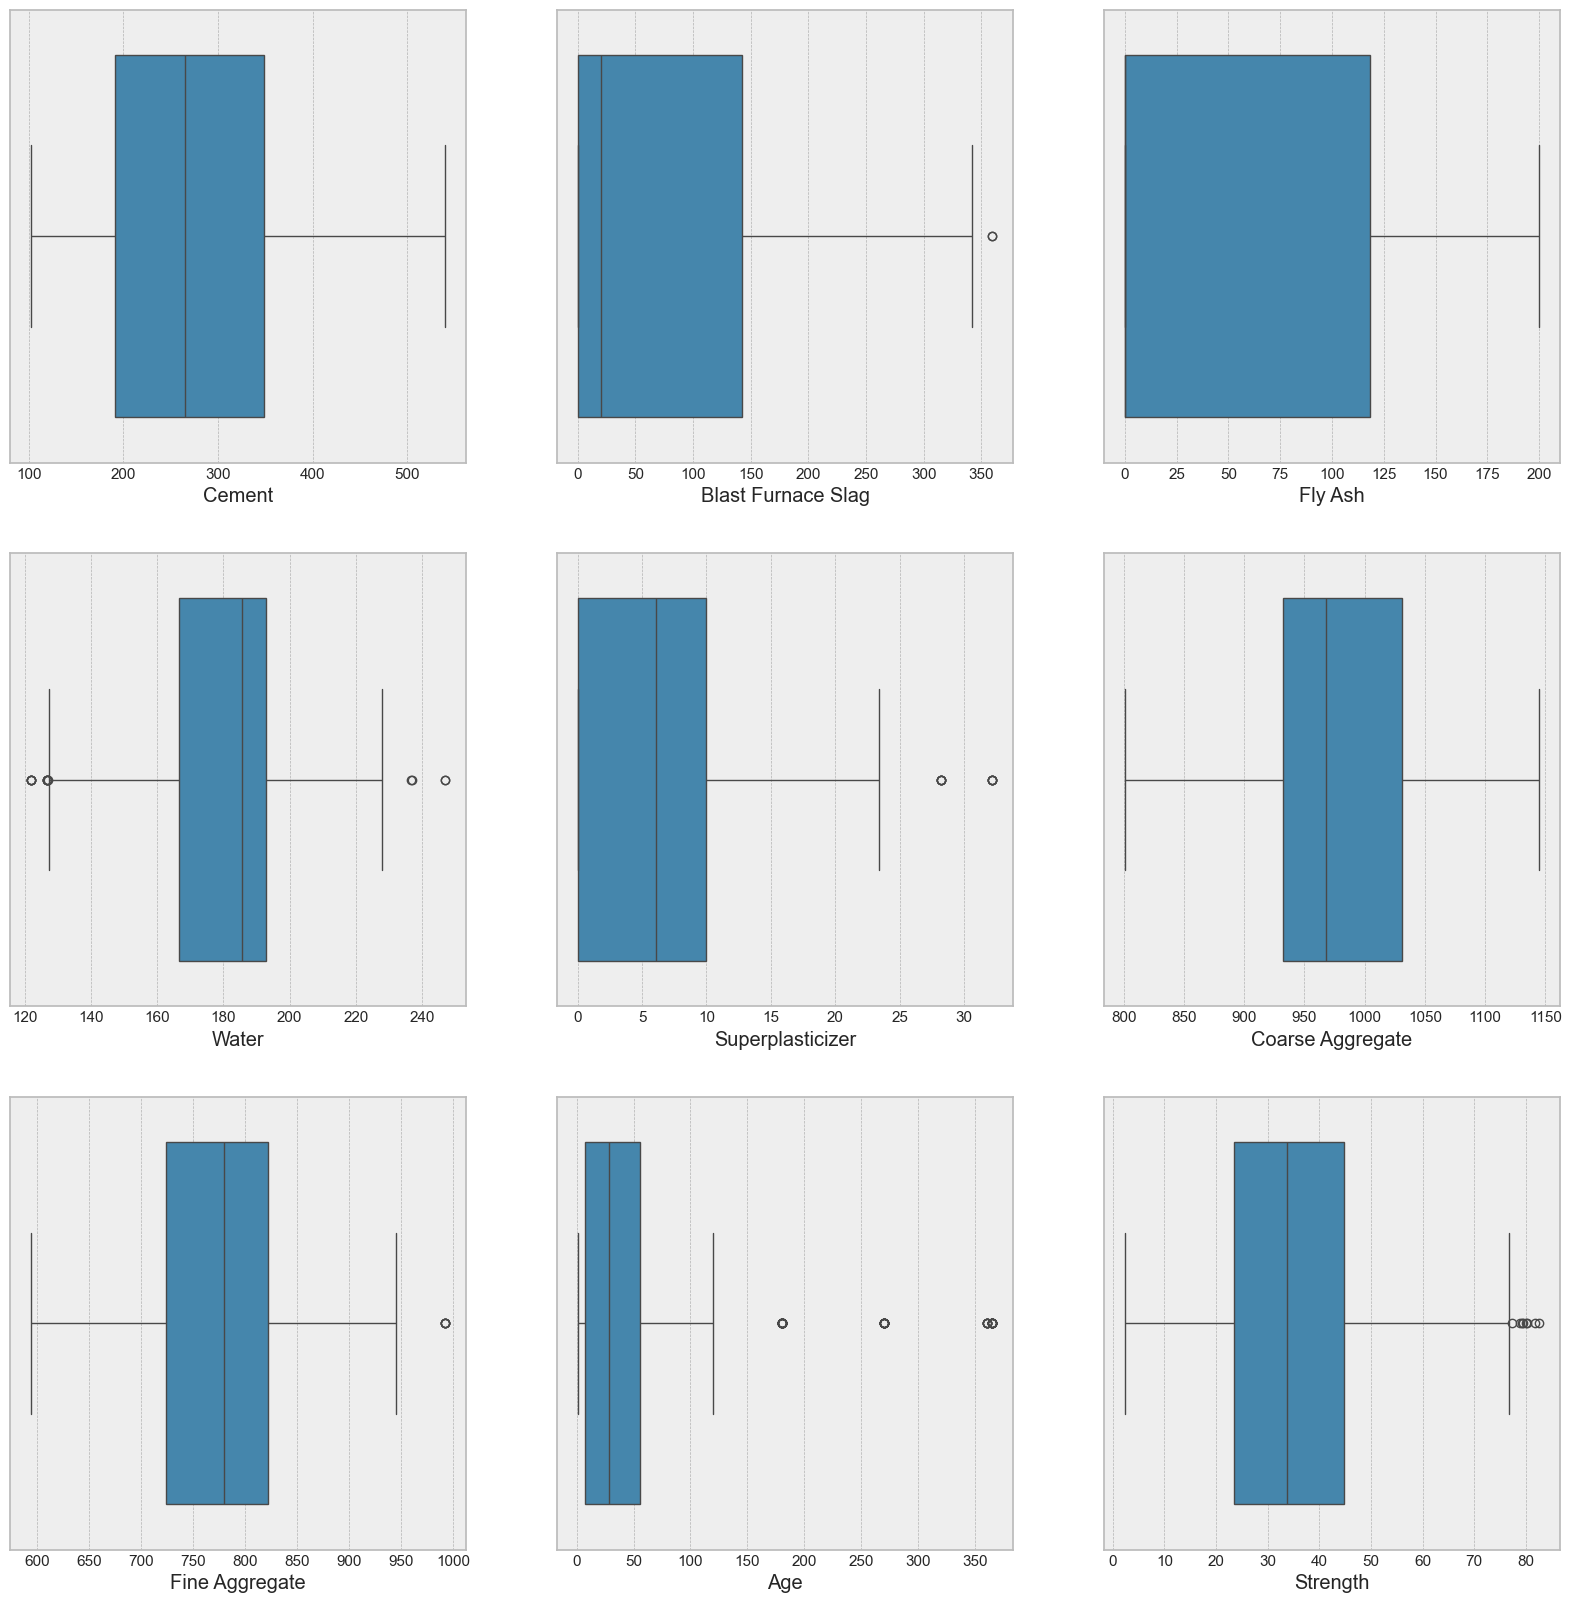

In [25]:
fig, axes = plt.subplots(3, 3, figsize = (20,20));
col_cnt = 0
col_names = df.columns.tolist()
for r in range(3):
    for c in range(3):
        try:
            sns.boxplot(df[col_names[col_cnt]], ax=axes[r][c], orient="h");
            col_cnt += 1
        except:
            pass

There are a few outliers in **Coarse Aggregate**, **Water**, **Superplasticizer**, **Fine Aggregate**, **Blast Furnace Slag** and **Age**. 

Removing the rows with outliers removes around 10% of the data so we will substitute them with the mean values.

In [26]:
outlier_cols = ["Coarse Aggregate","Blast Furnace Slag" ,"Water", "Superplasticizer", "Fine Aggregate", "Age"]
def cap_outliers(df, col):
    q1 = df_summary[col].loc["25%"]
    q3 = df_summary[col].loc["75%"]
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df.loc[df[col] < lower_bound, col] = df_summary[col].loc["mean"]
    df.loc[df[col] > upper_bound, col] = df_summary[col].loc["mean"]
    return df
    
    
for col in outlier_cols:
    df = cap_outliers(df, col)

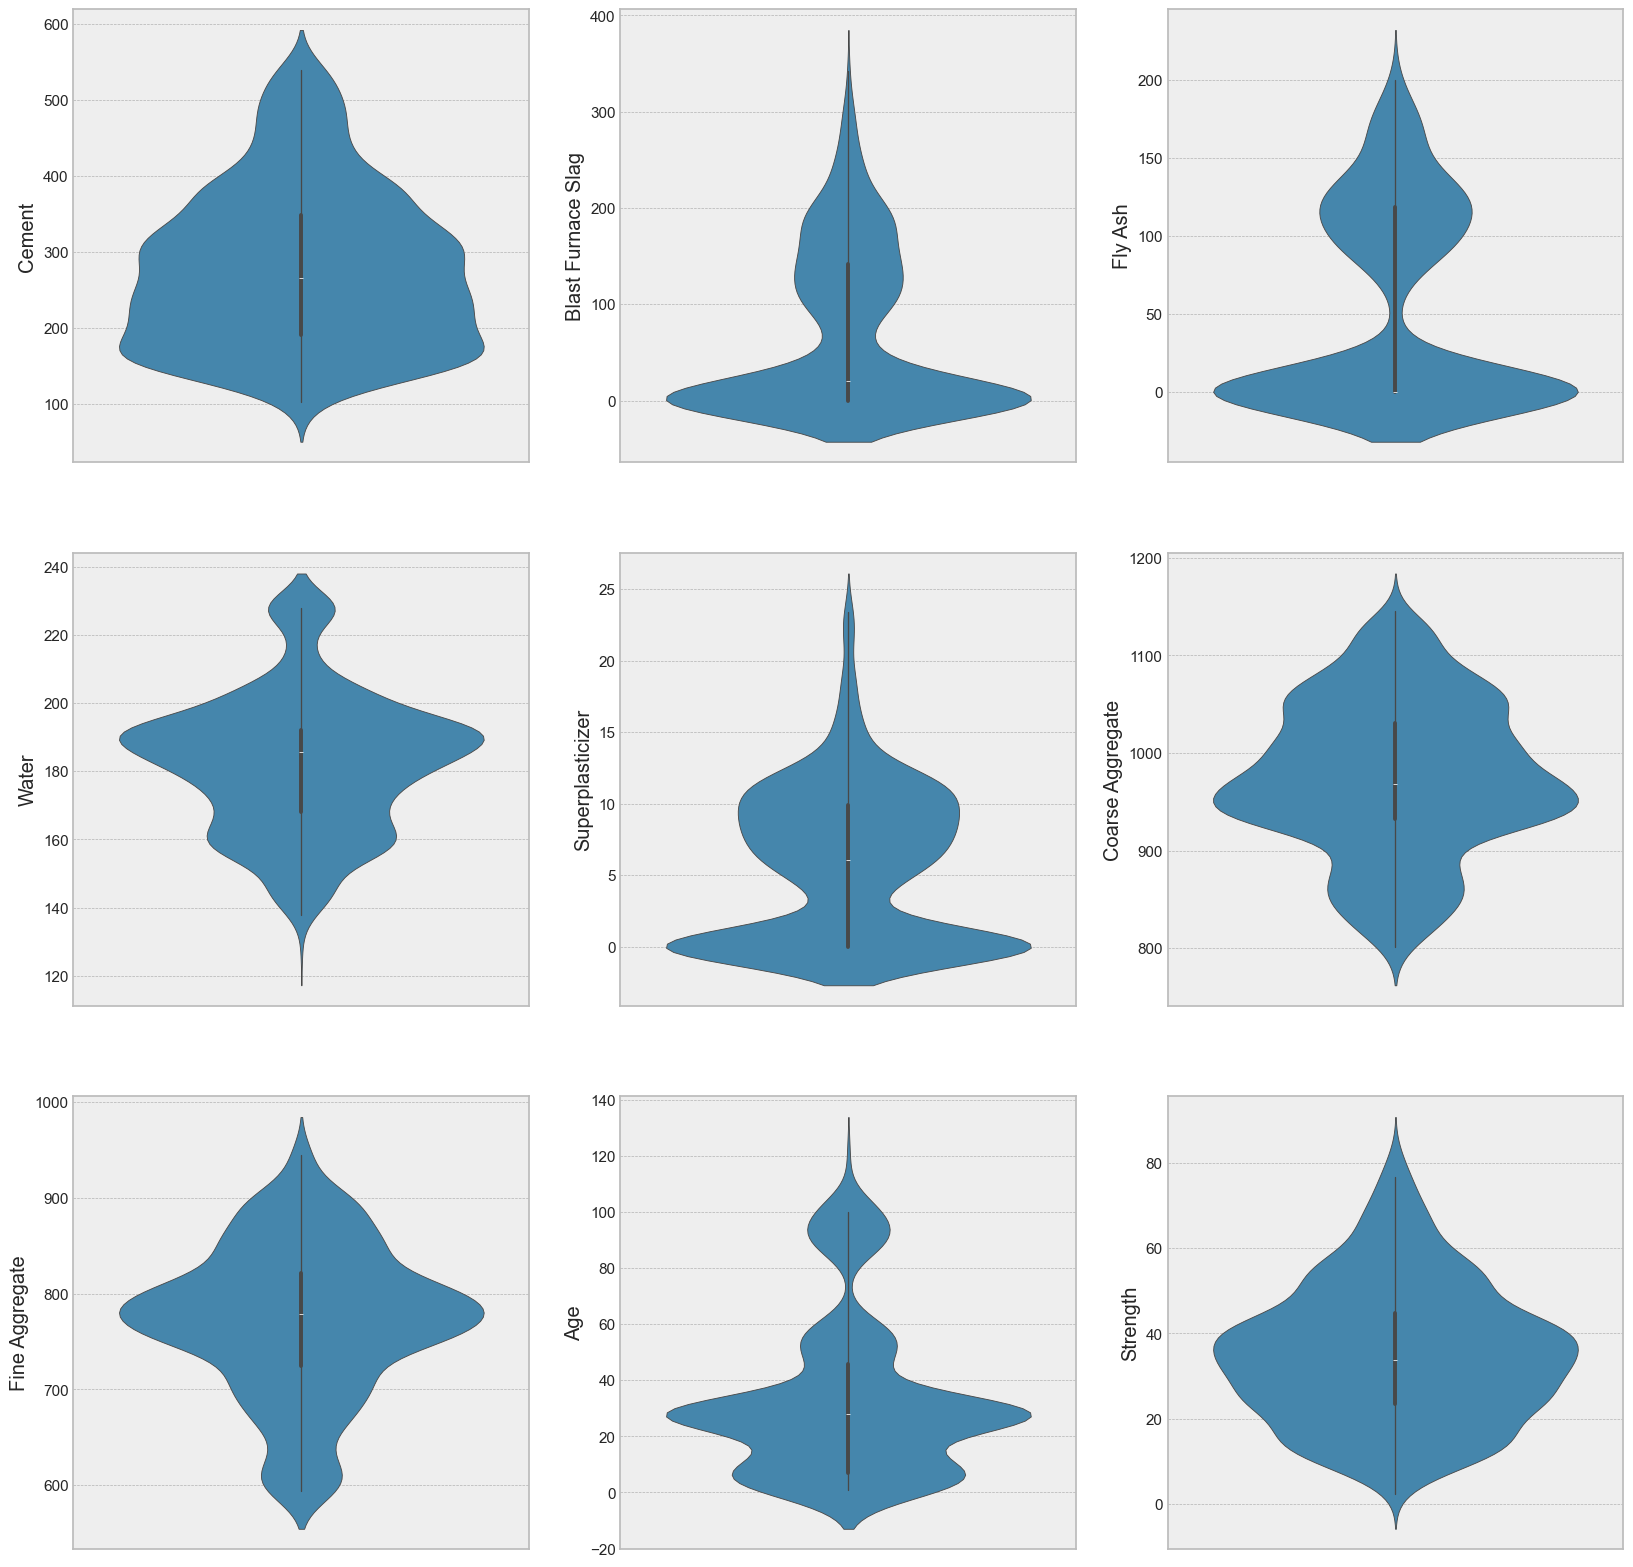

In [27]:
fig, axes = plt.subplots(3, 3, figsize = (20,20));
col_cnt = 0
col_names = df.columns.tolist()
for r in range(3):
    for c in range(3):
        try:
            sns.violinplot(df[col_names[col_cnt]], ax=axes[r][c], orient="v");
            col_cnt += 1
        except:
            pass

4. Exploring Data ( Visualization )

4.1 Visualize average strength distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)

##### Univariate Analysis

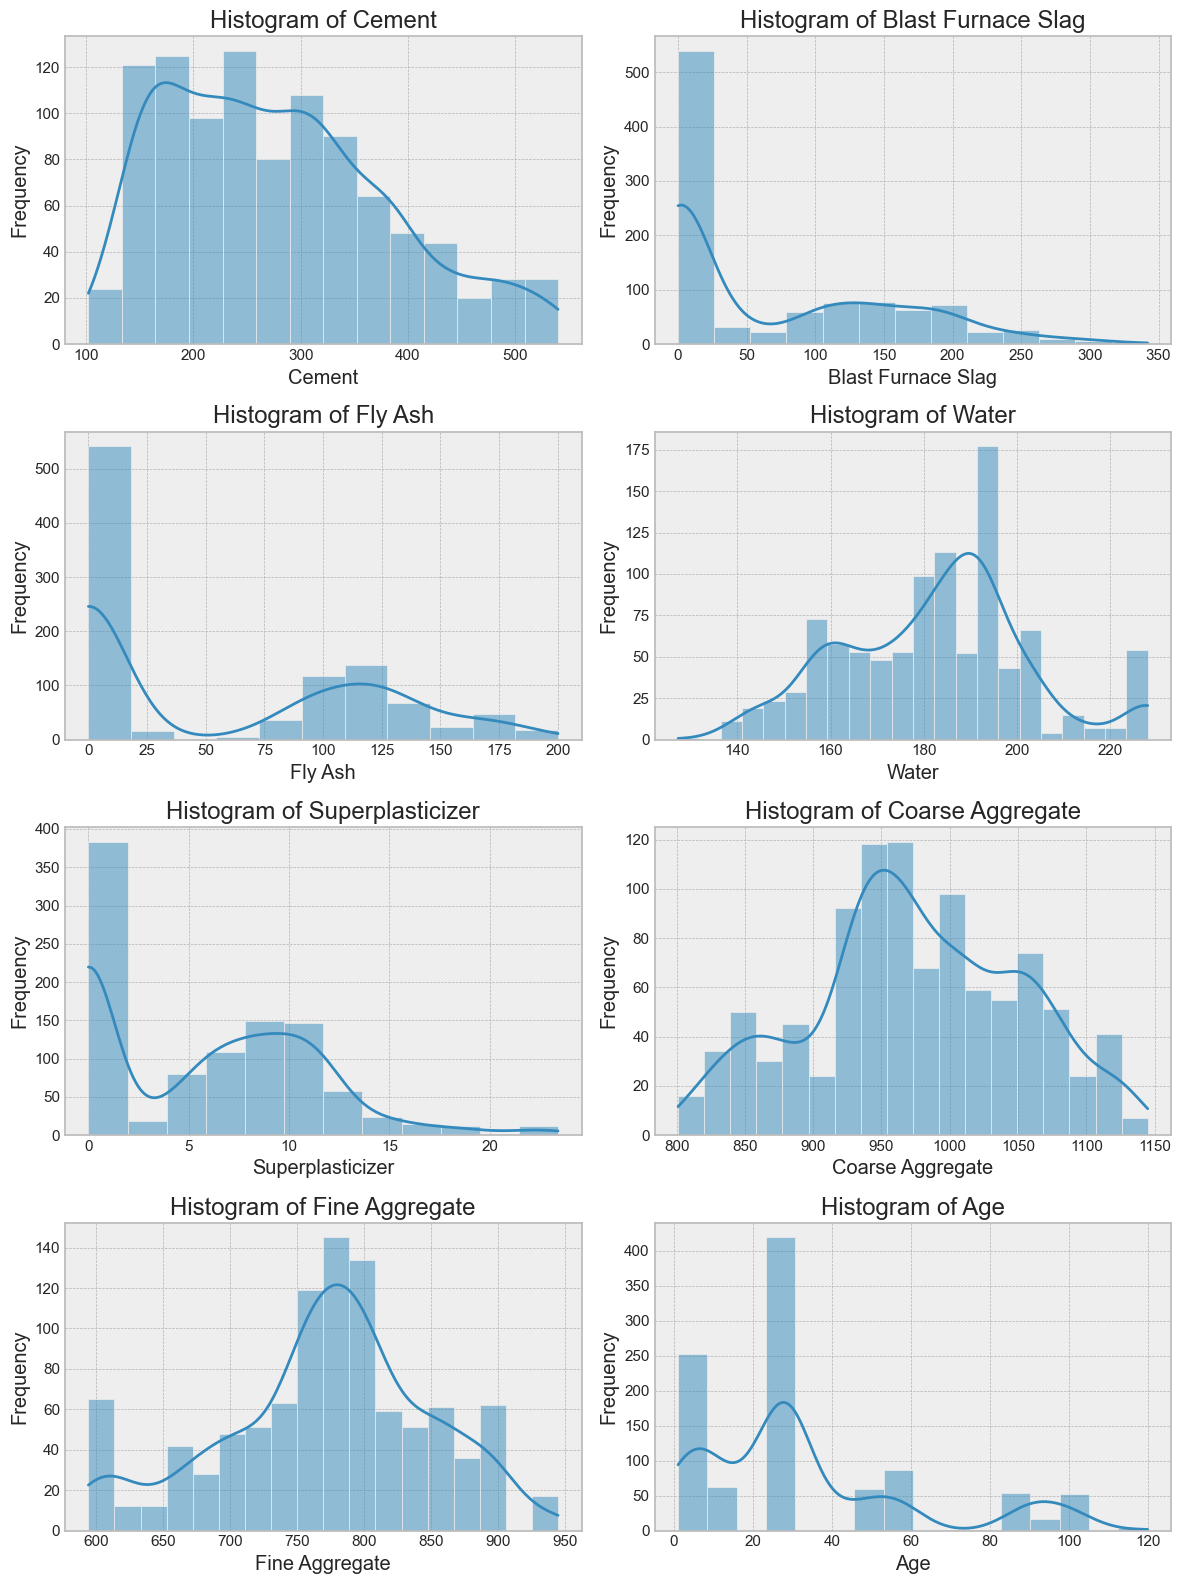

In [35]:
target = 'Strength' 

num_cols = len(df.columns) - 1  
num_rows = (num_cols - 1) // 2 + 1

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

if num_rows == 1:
    axes = [axes]

for i, column in enumerate(df.columns):
    if column != target:
        row = i // 2
        col = i % 2
        
        sns.histplot(data=df, x=column, ax=axes[row][col], kde=True)
        axes[row][col].set_title(f'Histogram of {column}')
        axes[row][col].set_xlabel(column)
        axes[row][col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Bivariate Analysis

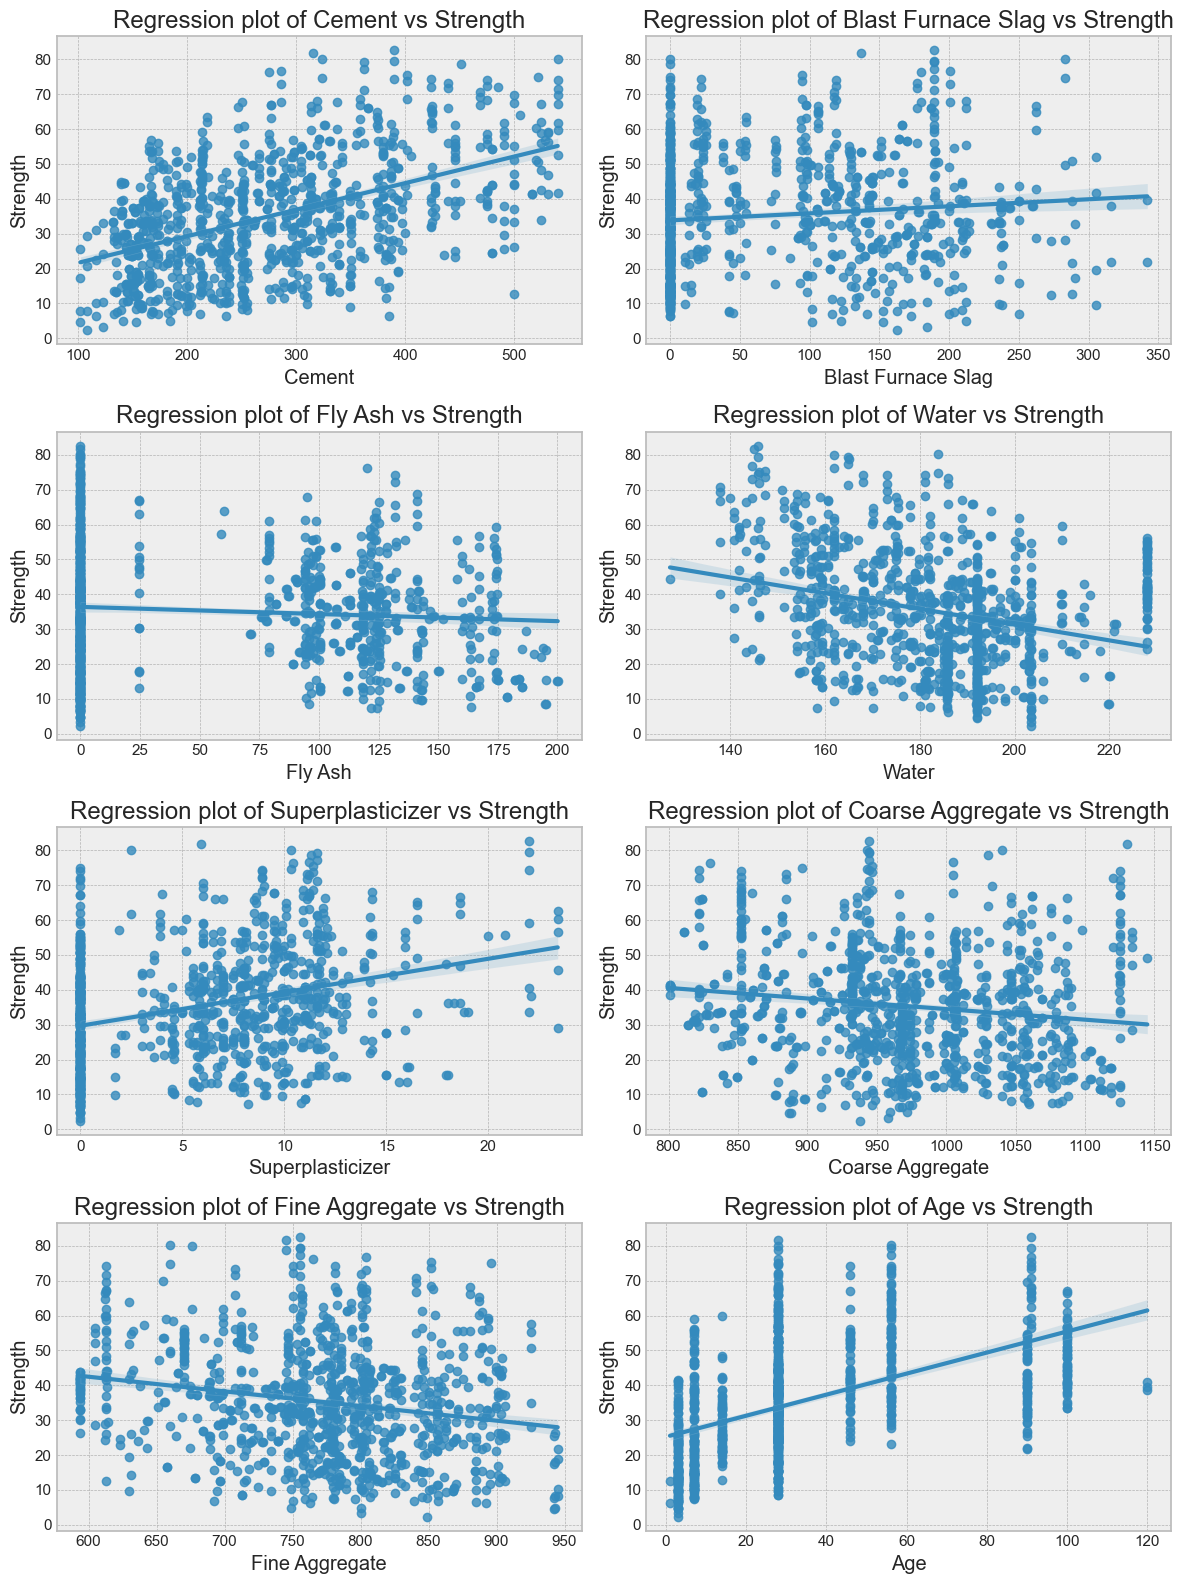

In [30]:
target = 'Strength' 

num_cols = len(df.columns) - 1 
num_rows = (num_cols - 1) // 2 + 1

fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

if num_rows == 1:
    axes = [axes]

for i, column in enumerate(df.columns):
    if column != target:
 
        row = i // 2
        col = i % 2

        sns.regplot(x=column, y=target, data=df, ax=axes[row][col])
        axes[row][col].set_title(f'Regression plot of {column} vs {target}')
        axes[row][col].set_xlabel(column)
        axes[row][col].set_ylabel(target)


# Adjust layout
plt.tight_layout()
plt.show()

##### Multivariate Analysis

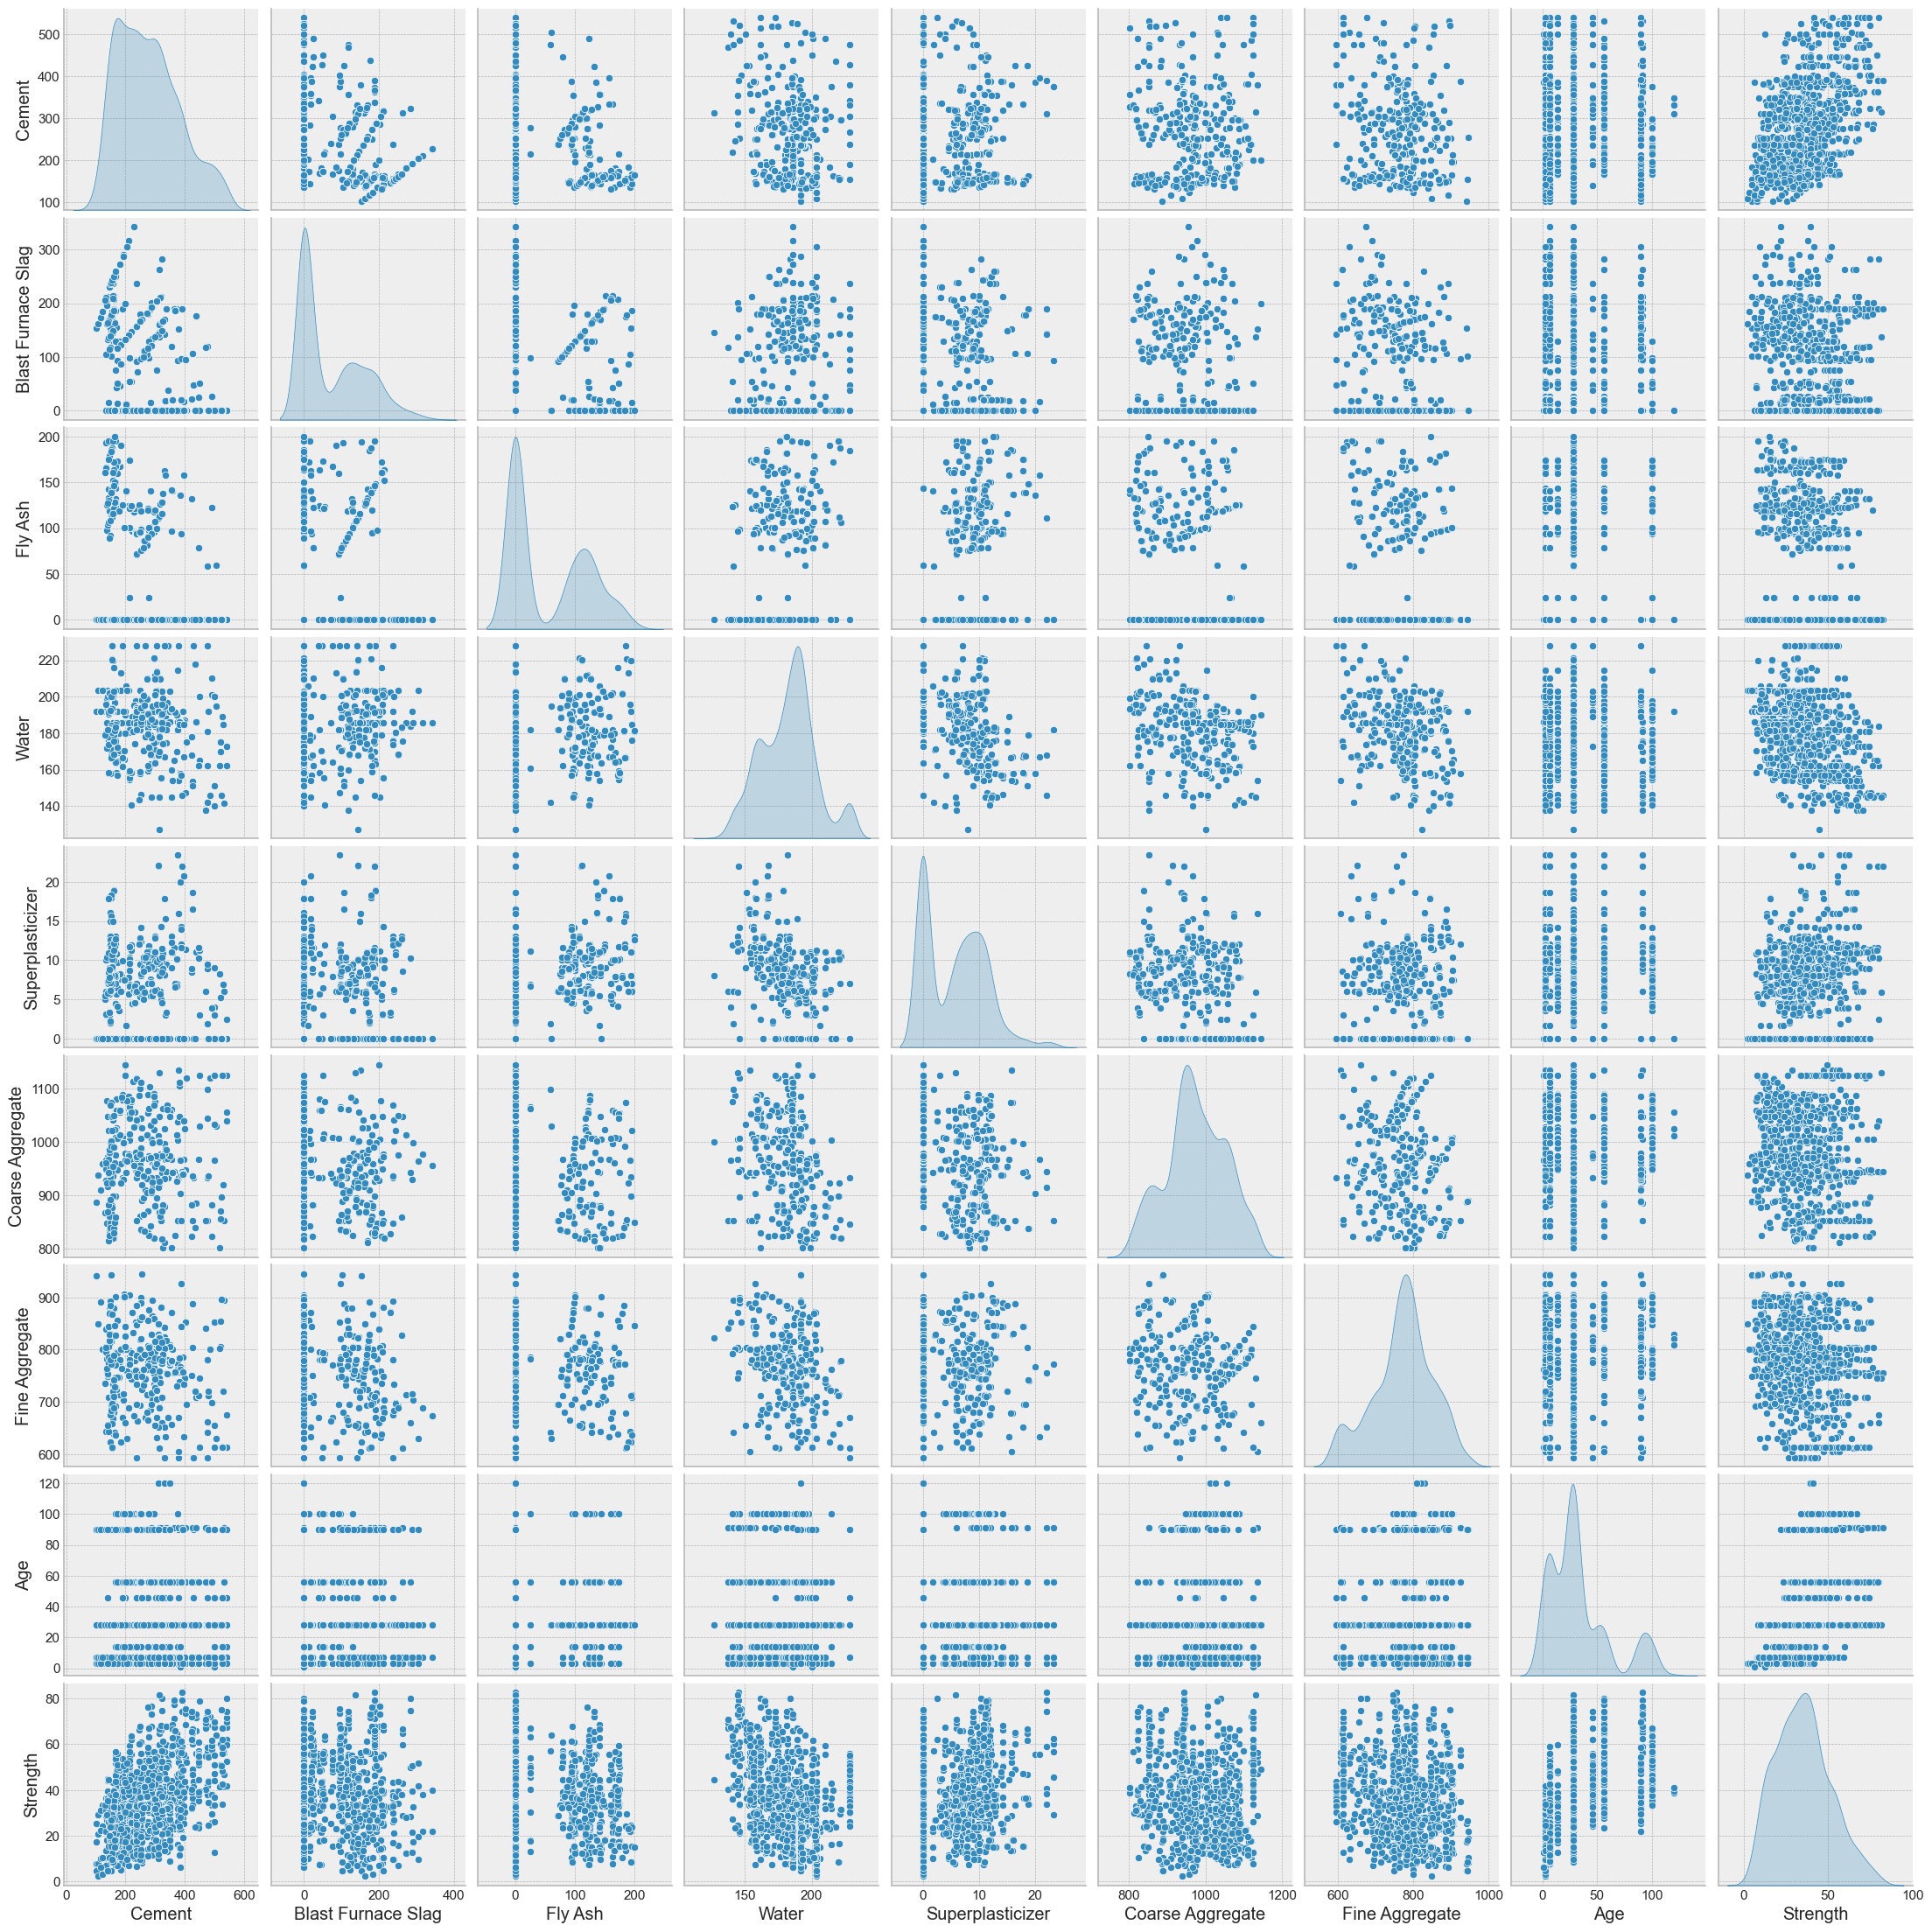

In [36]:
sns.pairplot(df, diag_kind="kde")

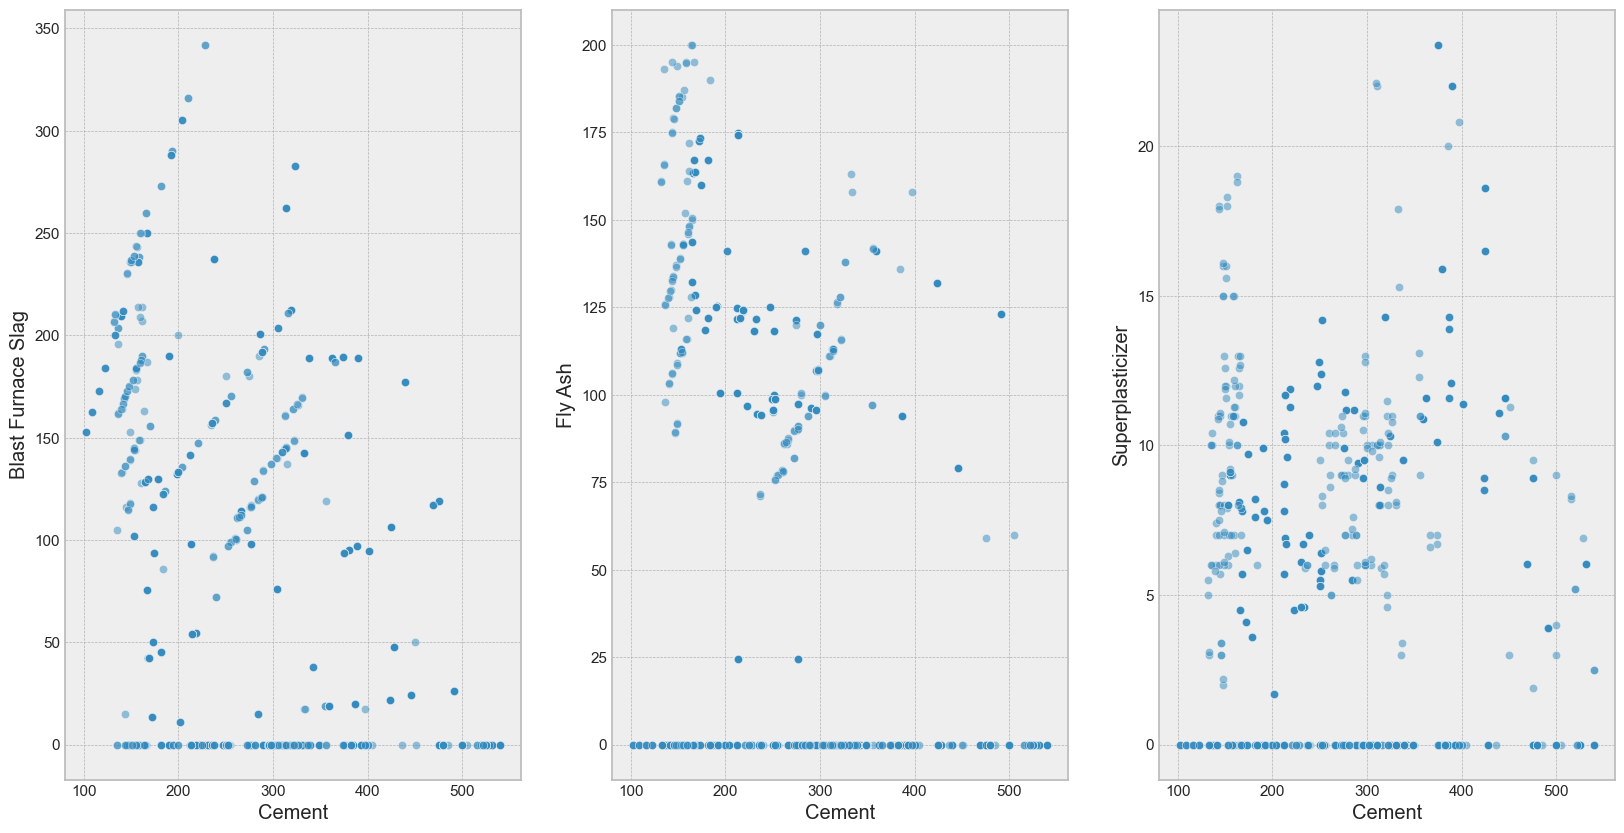

In [38]:
fig, axes = plt.subplots(1, 3, figsize = (20,10));

sns.scatterplot(y="Blast Furnace Slag", x="Cement", data=df, ax=axes[0], alpha=0.5);
sns.scatterplot(y="Fly Ash", x="Cement", data=df, ax=axes[1], alpha=0.5);
sns.scatterplot(y="Superplasticizer", x="Cement", data=df, ax=axes[2], alpha=0.5);

In the charts provided, distinct patterns emerge within the data, alongside numerous columns exhibiting zero values. Addressing these zeros through imputation using Linear Regression, incorporating additional features for prediction, seems warranted.

Observations:

- A noticeable trend unfolds as the quantity of cement rises, correlating with an increase in slag content, as evidenced in the initial chart.
- Upon closer examination of the relationship between cement and fly ash, a discernible pattern emerges with a negative slope, suggesting an inverse proportionality between cement and fly ash levels.
- The trend observed between cement and superplasticizer mirrors that of cement versus slag, indicating a similar underlying relationship.

#### Imputation for Zeros

In [40]:
def impute_values(alg, df, a, cols):
    df[a] = df[a].replace({0: np.nan})
    df_notnull = df[df[a].notna()]
    
    X = df_notnull[cols]
    y = df_notnull[a]
    
    df_null = df[df[a].isna()]
    test_X = df_null[cols]

    regr = alg
    regr.fit(X, y)

    pred = regr.predict(test_X)
    df_null = df[df[a].isna()]
    df_null[a] = pred
    
    xx = df[df[a].notna()]
    xx["null"] = 0
    df_null["null"] = 1
    df = pd.concat([xx, df_null], axis=0)
    cols.append(a)
    return df

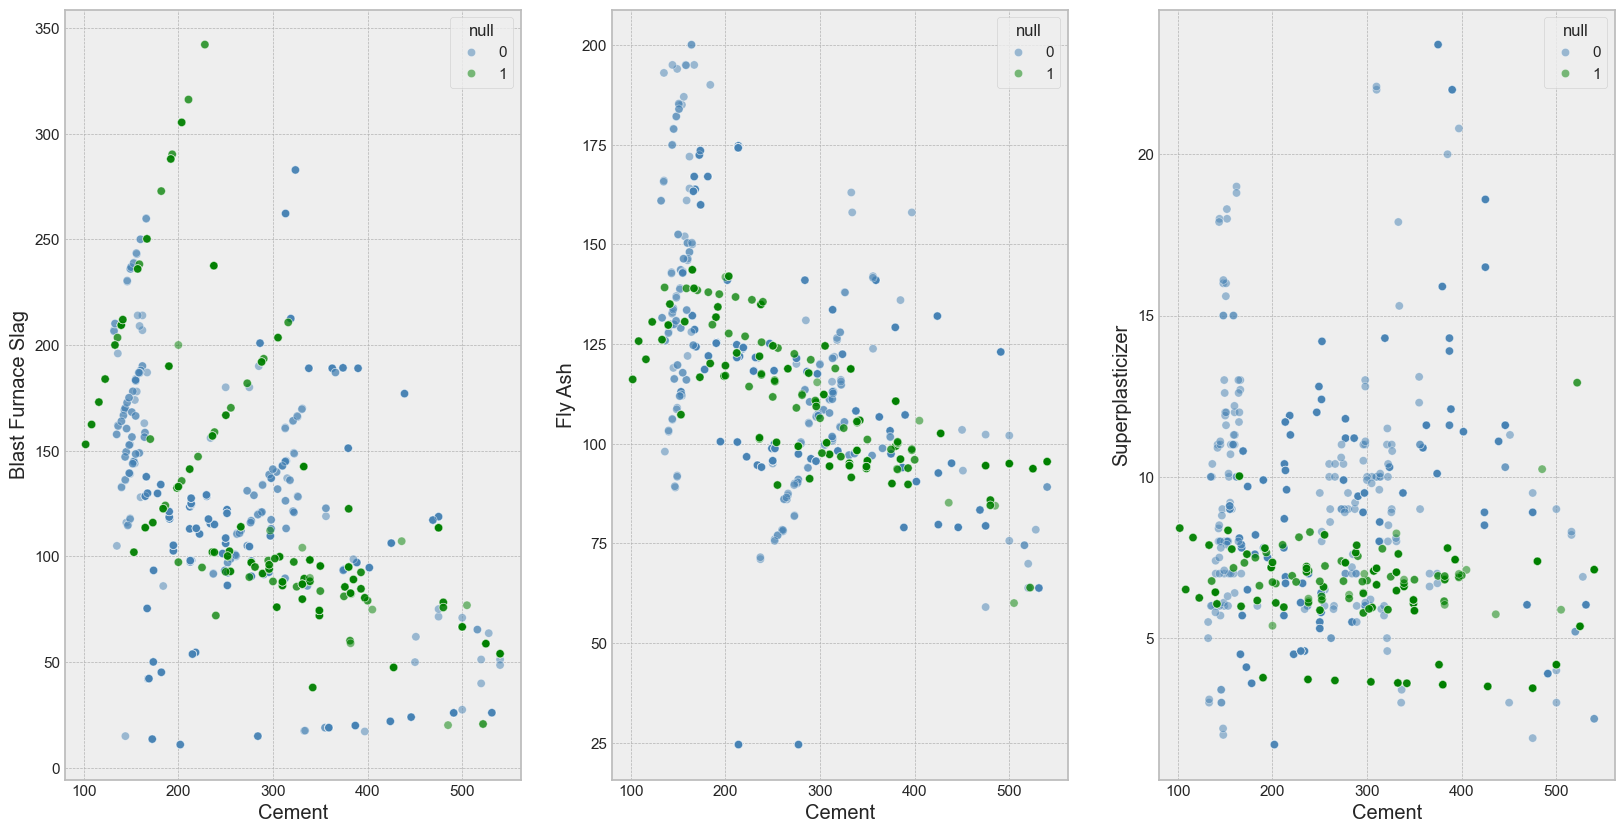

In [45]:
for col, params in {"Fly Ash": ["Cement", "Water", "Fine Aggregate"], "Blast Furnace Slag": ["Cement", "Coarse Aggregate", "Fine Aggregate"], "Superplasticizer" : ["Cement", "Water", "Coarse Aggregate"]}.items():
    alg = LinearRegression()
    df = impute_values(alg, df, col, params)
    
fig, axes = plt.subplots(1, 3, figsize = (20,10));

sns.scatterplot(y="Blast Furnace Slag", x="Cement", data=df, hue="null", ax=axes[0], alpha=0.5, palette=["steelblue", "green"]);
sns.scatterplot(y="Fly Ash", x="Cement", data=df, hue="null", ax=axes[1], alpha=0.5, palette=["steelblue", "green"]);
sns.scatterplot(y="Superplasticizer", x="Cement", data=df, hue="null", ax=axes[2], alpha=0.5, palette=["steelblue", "green"]);
plt.show()

- The plot above showcases the zero values imputed in green, while non-zero values are depicted in blue. Evidently, our imputed values align well with the observed patterns, affirming the effectiveness of our imputation approach.

In [47]:
df_copy = df.copy()
df_copy["cement_water_ratio"] = df_copy["Cement"]/df_copy["Water"]
df_copy["average_aggregate"] = (df_copy["Coarse Aggregate"] + df_copy["Fine Aggregate"])/2
df_copy.drop(columns=["Cement", "Water", "Coarse Aggregate", "Fine Aggregate"], inplace=True)

In [50]:
df_copy.drop(columns=["null"], inplace=True)

In [51]:
df_copy.sample(5)

,Blast Furnace Slag,Fly Ash,Superplasticizer,Age,Strength,cement_water_ratio,average_aggregate
926,214.000000,164.000000,10.000000,28.000000,30.65,0.801980,750.00
596,155.500000,138.476047,7.334113,7.000000,10.73,0.917071,875.45
616,97.119756,99.339963,7.337292,45.856716,33.70,1.450262,912.00
1014,206.500000,160.900000,5.500000,28.000000,33.31,0.737842,801.25
818,58.740814,93.705863,5.367099,28.000000,55.94,2.777778,869.00


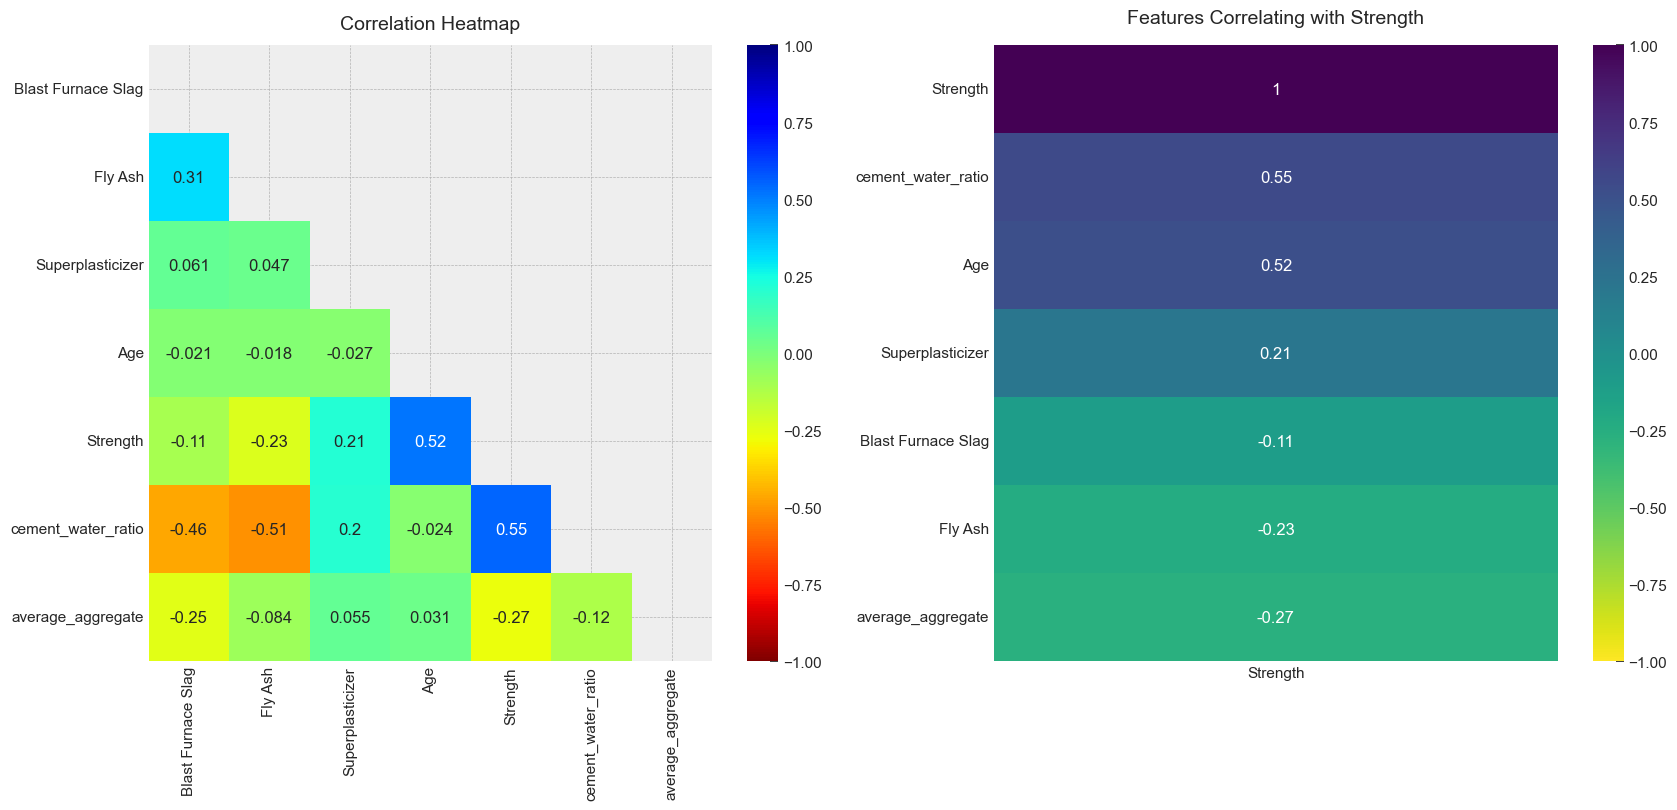

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 8)) 
resign_corr = df_copy.corr() 
mask = np.triu(np.ones_like(resign_corr, dtype=bool))
cat_heatmap = sns.heatmap(
    df_copy.corr(), mask=mask, vmin=-1, vmax=1, annot=True, ax=ax[0], cmap="jet_r"
)  # cornor heatmap of the dataframe correlation
cat_heatmap.set_title(
    "Correlation Heatmap", fontdict={"fontsize": 14}, pad=12
)

heatmap = sns.heatmap(
    resign_corr[["Strength"]].sort_values(by="Strength", ascending=False),
    vmin=-1,
    vmax=1,
    annot=True,
    ax=ax[1],
    cmap="viridis_r",
)  
heatmap.set_title(
    "Features Correlating with Strength",
    fontdict={"fontsize": 14},
    pad=16,  
)
plt.show()

* The target column **Strength** has good amount of correlation with **Age** and **cement_water_ratio**.
* The target column **Strength** has less amount of correlation with **average_aggregate** and **Fly Ash**.